## Mission Hospital - Package Pricing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
import statsmodels.api as smf
from statsmodels.tools.eval_measures import rmse

### Loading the dataset

In [2]:
mission_df = pd.read_csv( "hospital.csv" )

In [3]:
mission_df.head( 10 )

,AGE,GENDER,MARITAL_STATUS,KEY_COMPLAINTS_CODE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,...,TYPE_OF_ADMSN,TOTAL_COST_TO_HOSPITAL,TOTAL_AMOUNT_BILLED_TO_THE_PATIENT,CONCESSION,ACTUAL_RECEIVABLE_AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_,COST_OF_IMPLANT
0,58.0,M,MARRIED,other- heart,49,160,118,100.0,80.0,32,...,EMERGENCY,660293.00,474901,0,474901,25,12,13,Y,38000
1,59.0,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,28,...,EMERGENCY,809130.00,944819,96422,848397,41,20,21,Y,39690
2,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,20,...,ELECTIVE,362231.00,390000,30000,360000,18,9,9,N,0
3,46.0,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,24,...,EMERGENCY,629990.00,324910,0,324910,14,13,1,Y,89450
4,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,18,...,EMERGENCY,444876.00,254673,10000,244673,24,12,12,N,0
5,75.0,M,MARRIED,CAD-DVD,45,140,130,215.0,140.0,42,...,EMERGENCY,372357.00,499987,0,499987,31,9,22,N,0
6,73.0,M,MARRIED,CAD-TVD,60,170,108,160.0,90.0,24,...,ELECTIVE,887350.00,660504,504,660000,15,15,0,N,0
7,71.0,M,MARRIED,CAD-TVD,44,164,60,130.0,90.0,22,...,EMERGENCY,389827.00,248580,0,248580,24,11,13,N,0
8,72.0,M,MARRIED,CAD-DVD,72,174,95,100.0,50.0,25,...,EMERGENCY,437529.07,691297,0,691297,26,9,17,N,0
9,61.0,M,MARRIED,CAD-TVD,77,175,66,140.0,90.0,22,...,ELECTIVE,364222.00,247654,0,247654,20,4,16,N,0


In [4]:
mission_df.columns

Index(['AGE', 'GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
       'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL', 'TYPE_OF_ADMSN',
       'TOTAL_COST_TO_HOSPITAL', 'TOTAL_AMOUNT_BILLED_TO_THE_PATIENT',
       'CONCESSION', 'ACTUAL_RECEIVABLE_AMOUNT', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_',
       'COST_OF_IMPLANT'],
      dtype='object')

In [5]:
mission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 248 non-null    float64
 1   GENDER                              248 non-null    object 
 2   MARITAL_STATUS                      248 non-null    object 
 3   KEY_COMPLAINTS_CODE                 212 non-null    object 
 4   BODY_WEIGHT                         248 non-null    int64  
 5   BODY_HEIGHT                         248 non-null    int64  
 6   HR_PULSE                            248 non-null    int64  
 7   BP_HIGH                             225 non-null    float64
 8   BP_LOW                              225 non-null    float64
 9   RR                                  248 non-null    int64  
 10  PAST_MEDICAL_HISTORY_CODE           75 non-null     object 
 11  HB                                  246 non-n

## Exploratory Data Analysis

### Distribution of Total Amount billed to patient

<Axes: xlabel='TOTAL_COST_TO_HOSPITAL', ylabel='Density'>

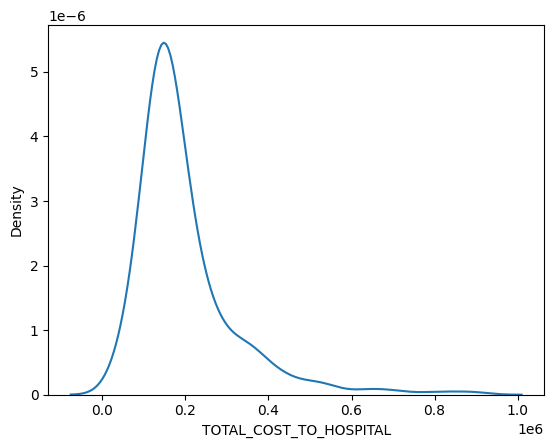

In [6]:
sn.kdeplot( mission_df.TOTAL_COST_TO_HOSPITAL )

## Remove Extreme Outliers

In [7]:
from scipy import stats

In [8]:
cost_iqr = stats.iqr( mission_df.TOTAL_COST_TO_HOSPITAL )

In [9]:
cost_75_percentile = mission_df.TOTAL_COST_TO_HOSPITAL.quantile( 0.75 )

In [10]:
outliers_costs = cost_75_percentile + 1.5 * cost_iqr

In [11]:
outliers_costs

np.float64(354055.875)

In [12]:
mission_df = mission_df[ mission_df.TOTAL_COST_TO_HOSPITAL < outliers_costs ]

In [13]:
mission_df.shape

(224, 26)

In [14]:
mission_df.TOTAL_COST_TO_HOSPITAL.skew()

np.float64(0.8524479025873576)

### Length of stay

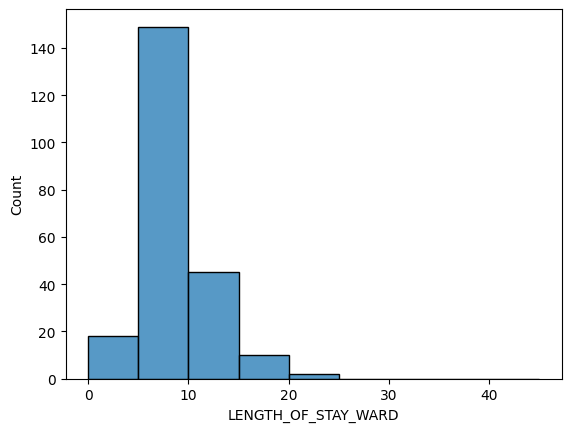

In [15]:
sn.histplot( mission_df.LENGTH_OF_STAY_WARD, bins = range(0, 50, 5));

### Find distribution of following parameters

### Correlation between *Age* and *Amount Billed*

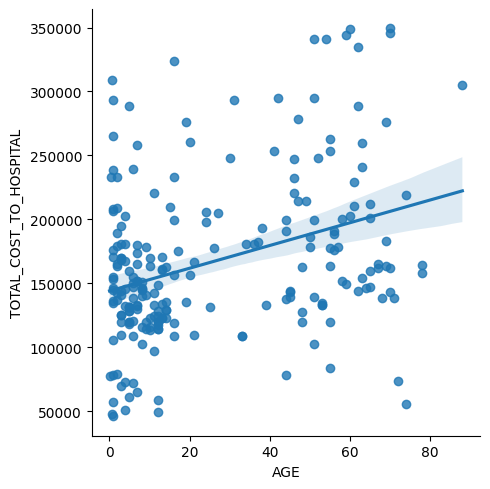

In [16]:
sn.lmplot( x = 'AGE', y = 'TOTAL_COST_TO_HOSPITAL', data = mission_df )

## Variable Transformation and Selection

In [17]:
mission_df['STAY_LENGTH'] = mission_df['LENGTH_OF_STAY_WARD'].map(lambda x: "LONG" if x > 10 else "SHORT")

In [18]:
all_features = ['AGE', 'GENDER',
                'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
                'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
                'PAST_MEDICAL_HISTORY_CODE', 'HB', 'UREA',
                'CREATININE',
                'MODE_OF_ARRIVAL',
                'STATE_AT_THE_TIME_OF_ARRIVAL',
                'TYPE_OF_ADMSN', 'STAY_LENGTH', 'IMPLANT_USED_']

In [19]:
continuous_features = ['AGE','BODY_WEIGHT', 'BODY_HEIGHT',
                       'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
                       'HB','UREA', 'CREATININE' ]

In [20]:
categorical_features = list( set( all_features ) - set( continuous_features ) )

In [21]:
categorical_features

['PAST_MEDICAL_HISTORY_CODE',
 'IMPLANT_USED_',
 'STAY_LENGTH',
 'KEY_COMPLAINTS_CODE',
 'GENDER',
 'STATE_AT_THE_TIME_OF_ARRIVAL',
 'TYPE_OF_ADMSN',
 'MODE_OF_ARRIVAL']

## Pairplot with all continuous features

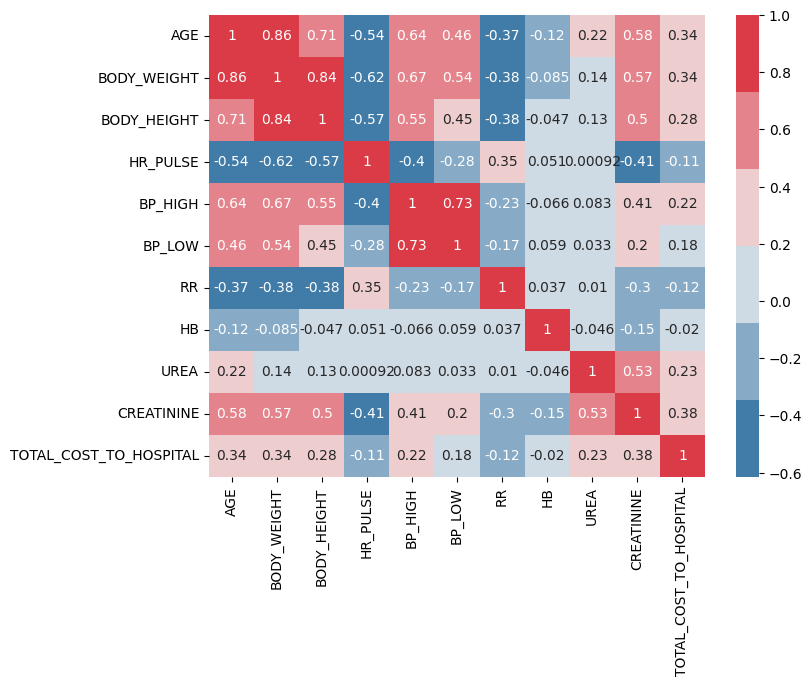

In [22]:
plt.figure( figsize = (8,6) )
sn.heatmap( mission_df[continuous_features
                       + ['TOTAL_COST_TO_HOSPITAL']].corr()
           , annot = True
           , cmap = sn.diverging_palette(240, 10));

### Highly Correlated Variables

- BODY_HEIGHT and BODY_WEIGHT seem to be highly correlated. We can remove one of them.
- Or introduce a new variable called BMI = BODY_WEIGHT / BODY_HEIGHT

In [23]:
continuous_features.remove('BODY_WEIGHT')
continuous_features.remove('BP_HIGH')

### Distribution of total cost for different medical history

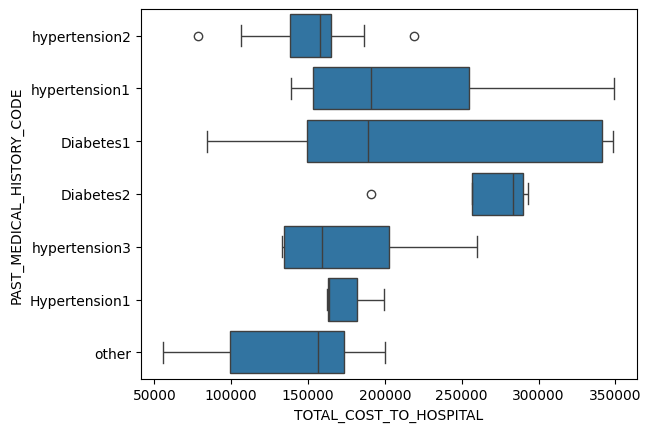

In [24]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE',
           x = 'TOTAL_COST_TO_HOSPITAL',
           data = mission_df );

### Imputing missing past medical history to None

In [25]:
mission_final_df = mission_df.copy()

In [26]:
mission_final_df['PAST_MEDICAL_HISTORY_CODE'] = (mission_final_df
                                                 ['PAST_MEDICAL_HISTORY_CODE']
                                                 .fillna( 'other' ))

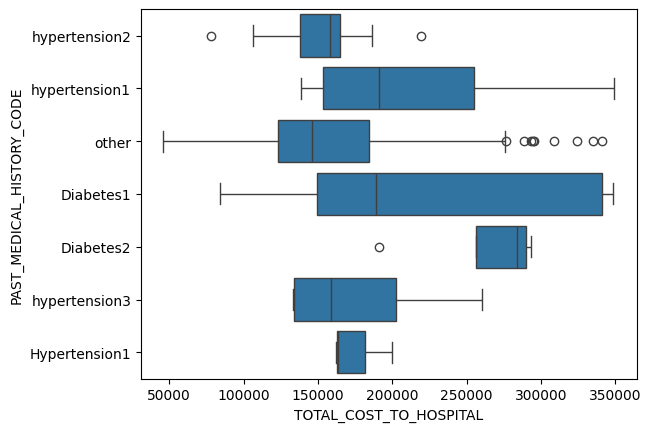

In [27]:
sn.boxplot( y = 'PAST_MEDICAL_HISTORY_CODE',
           x = 'TOTAL_COST_TO_HOSPITAL',
           data = mission_final_df );

### *Mean* Imputation for other features

In [28]:
mission_final_df["BP_LOW"] = mission_final_df["BP_LOW"].fillna(mission_final_df["BP_LOW"].mean())
mission_final_df["HB"] = mission_final_df["HB"].fillna(mission_final_df["HB"].mean())
mission_final_df["UREA"] = mission_final_df["UREA"].fillna(mission_final_df["UREA"].mean())
mission_final_df["CREATININE"] = mission_final_df["CREATININE"].fillna(mission_final_df["CREATININE"].mean())

### Any more null values

In [29]:
mission_final_df[all_features].info();

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 15 to 247
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           224 non-null    float64
 1   GENDER                        224 non-null    object 
 2   KEY_COMPLAINTS_CODE           189 non-null    object 
 3   BODY_WEIGHT                   224 non-null    int64  
 4   BODY_HEIGHT                   224 non-null    int64  
 5   HR_PULSE                      224 non-null    int64  
 6   BP_HIGH                       202 non-null    float64
 7   BP_LOW                        224 non-null    float64
 8   RR                            224 non-null    int64  
 9   PAST_MEDICAL_HISTORY_CODE     224 non-null    object 
 10  HB                            224 non-null    float64
 11  UREA                          224 non-null    float64
 12  CREATININE                    224 non-null    float64
 13  MODE_OF_A

In [30]:
mission_final_df['KEY_COMPLAINTS_CODE'].value_counts()

,count
KEY_COMPLAINTS_CODE,
other- heart,52
RHD,24
ACHD,19
other-tertalogy,18
CAD-DVD,18
CAD-TVD,17
OS-ASD,15
other- respiratory,14
PM-VSD,6


In [31]:
mission_final_df['KEY_COMPLAINTS_CODE'] = (mission_final_df['KEY_COMPLAINTS_CODE'].fillna( 'other-general' ))

In [32]:
len( mission_final_df )

224

# Building Linear Regression Model

## Convert Categorical Features to Dummy Variables

In [33]:
mission_final_df[all_features]

,AGE,GENDER,KEY_COMPLAINTS_CODE,BODY_WEIGHT,BODY_HEIGHT,HR_PULSE,BP_HIGH,BP_LOW,RR,PAST_MEDICAL_HISTORY_CODE,HB,UREA,CREATININE,MODE_OF_ARRIVAL,STATE_AT_THE_TIME_OF_ARRIVAL,TYPE_OF_ADMSN,STAY_LENGTH,IMPLANT_USED_
15,78.0,F,CAD-DVD,70,154,63,150.0,90.0,20,hypertension2,10.0,25.0,1.0,WALKED IN,ALERT,ELECTIVE,SHORT,N
17,59.0,F,RHD,47,150,60,130.0,90.0,24,hypertension1,12.0,15.0,0.7,WALKED IN,ALERT,ELECTIVE,LONG,Y
19,47.0,M,CAD-DVD,59,160,80,110.0,80.0,20,other,14.0,15.0,0.6,WALKED IN,ALERT,ELECTIVE,SHORT,N
20,54.0,F,CAD-DVD,51,147,110,100.0,70.0,26,Diabetes1,11.0,16.0,0.5,WALKED IN,ALERT,ELECTIVE,SHORT,N
21,62.0,M,CAD-TVD,74,160,60,160.0,70.0,24,Diabetes2,10.0,31.0,1.1,WALKED IN,ALERT,ELECTIVE,SHORT,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,M,other- heart,69,176,62,130.0,90.0,24,other,13.0,26.0,1.1,WALKED IN,ALERT,ELECTIVE,SHORT,Y
244,58.0,M,CAD-TVD,57,159,58,100.0,70.0,24,other,11.0,15.0,0.8,WALKED IN,ALERT,ELECTIVE,SHORT,Y
245,44.0,M,CAD-TVD,58,159,68,150.0,90.0,24,hypertension1,15.0,23.0,0.9,WALKED IN,ALERT,ELECTIVE,SHORT,N
246,60.0,M,other- heart,65,165,98,100.0,60.0,17,other,15.0,36.0,1.0,AMBULANCE,ALERT,EMERGENCY,SHORT,N


In [34]:
encoded_mission_final_df = pd.get_dummies(mission_final_df[continuous_features+categorical_features],
                                          columns = categorical_features,
                                          drop_first = True,
                                          dtype = 'int')

In [35]:
encoded_mission_final_df[0:5]

,AGE,BODY_HEIGHT,HR_PULSE,BP_LOW,RR,HB,UREA,CREATININE,PAST_MEDICAL_HISTORY_CODE_Diabetes2,PAST_MEDICAL_HISTORY_CODE_Hypertension1,...,KEY_COMPLAINTS_CODE_other- heart,KEY_COMPLAINTS_CODE_other- respiratory,KEY_COMPLAINTS_CODE_other-general,KEY_COMPLAINTS_CODE_other-nervous,KEY_COMPLAINTS_CODE_other-tertalogy,GENDER_M,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,TYPE_OF_ADMSN_EMERGENCY,MODE_OF_ARRIVAL_TRANSFERRED,MODE_OF_ARRIVAL_WALKED IN
15,78.0,154,63,90.0,20,10.0,25.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,59.0,150,60,90.0,24,12.0,15.0,0.7,0,0,...,0,0,0,0,0,0,0,0,0,1
19,47.0,160,80,80.0,20,14.0,15.0,0.6,0,0,...,0,0,0,0,0,1,0,0,0,1
20,54.0,147,110,70.0,26,11.0,16.0,0.5,0,0,...,0,0,0,0,0,0,0,0,0,1
21,62.0,160,60,70.0,24,10.0,31.0,1.1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [36]:
encoded_mission_final_df.columns

Index(['AGE', 'BODY_HEIGHT', 'HR_PULSE', 'BP_LOW', 'RR', 'HB', 'UREA',
       'CREATININE', 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
       'PAST_MEDICAL_HISTORY_CODE_Hypertension1',
       'PAST_MEDICAL_HISTORY_CODE_hypertension1',
       'PAST_MEDICAL_HISTORY_CODE_hypertension2',
       'PAST_MEDICAL_HISTORY_CODE_hypertension3',
       'PAST_MEDICAL_HISTORY_CODE_other', 'IMPLANT_USED__Y',
       'STAY_LENGTH_SHORT', 'KEY_COMPLAINTS_CODE_CAD-DVD',
       'KEY_COMPLAINTS_CODE_CAD-SVD', 'KEY_COMPLAINTS_CODE_CAD-TVD',
       'KEY_COMPLAINTS_CODE_CAD-VSD', 'KEY_COMPLAINTS_CODE_OS-ASD',
       'KEY_COMPLAINTS_CODE_PM-VSD', 'KEY_COMPLAINTS_CODE_RHD',
       'KEY_COMPLAINTS_CODE_other- heart',
       'KEY_COMPLAINTS_CODE_other- respiratory',
       'KEY_COMPLAINTS_CODE_other-general',
       'KEY_COMPLAINTS_CODE_other-nervous',
       'KEY_COMPLAINTS_CODE_other-tertalogy', 'GENDER_M',
       'STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED', 'TYPE_OF_ADMSN_EMERGENCY',
       'MODE_OF_ARRIVAL_TRANSFERRED

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif

    return vif_factors

In [38]:
encoded_mission_final_df

,AGE,BODY_HEIGHT,HR_PULSE,BP_LOW,RR,HB,UREA,CREATININE,PAST_MEDICAL_HISTORY_CODE_Diabetes2,PAST_MEDICAL_HISTORY_CODE_Hypertension1,...,KEY_COMPLAINTS_CODE_other- heart,KEY_COMPLAINTS_CODE_other- respiratory,KEY_COMPLAINTS_CODE_other-general,KEY_COMPLAINTS_CODE_other-nervous,KEY_COMPLAINTS_CODE_other-tertalogy,GENDER_M,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,TYPE_OF_ADMSN_EMERGENCY,MODE_OF_ARRIVAL_TRANSFERRED,MODE_OF_ARRIVAL_WALKED IN
15,78.0,154,63,90.0,20,10.0,25.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,59.0,150,60,90.0,24,12.0,15.0,0.7,0,0,...,0,0,0,0,0,0,0,0,0,1
19,47.0,160,80,80.0,20,14.0,15.0,0.6,0,0,...,0,0,0,0,0,1,0,0,0,1
20,54.0,147,110,70.0,26,11.0,16.0,0.5,0,0,...,0,0,0,0,0,0,0,0,0,1
21,62.0,160,60,70.0,24,10.0,31.0,1.1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,176,62,90.0,24,13.0,26.0,1.1,0,0,...,1,0,0,0,0,1,0,0,0,1
244,58.0,159,58,70.0,24,11.0,15.0,0.8,0,0,...,0,0,0,0,0,1,0,0,0,1
245,44.0,159,68,90.0,24,15.0,23.0,0.9,0,0,...,0,0,0,0,0,1,0,0,0,1
246,60.0,165,98,60.0,17,15.0,36.0,1.0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [39]:
vif_factors = get_vif_factors(encoded_mission_final_df)
vif_factors

,column,vif
0,AGE,9.672395
1,BODY_HEIGHT,38.380523
2,HR_PULSE,36.616984
3,BP_LOW,35.930131
4,RR,55.807412
5,HB,24.876049
6,UREA,8.275592
7,CREATININE,15.880057
8,PAST_MEDICAL_HISTORY_CODE_Diabetes2,1.951617
9,PAST_MEDICAL_HISTORY_CODE_Hypertension1,1.476973


In [40]:
high_vif_cols = list(vif_factors[vif_factors.vif > 10]['column'])

In [41]:
high_vif_cols

['BODY_HEIGHT',
 'HR_PULSE',
 'BP_LOW',
 'RR',
 'HB',
 'CREATININE',
 'PAST_MEDICAL_HISTORY_CODE_other',
 'TYPE_OF_ADMSN_EMERGENCY',
 'MODE_OF_ARRIVAL_WALKED IN']

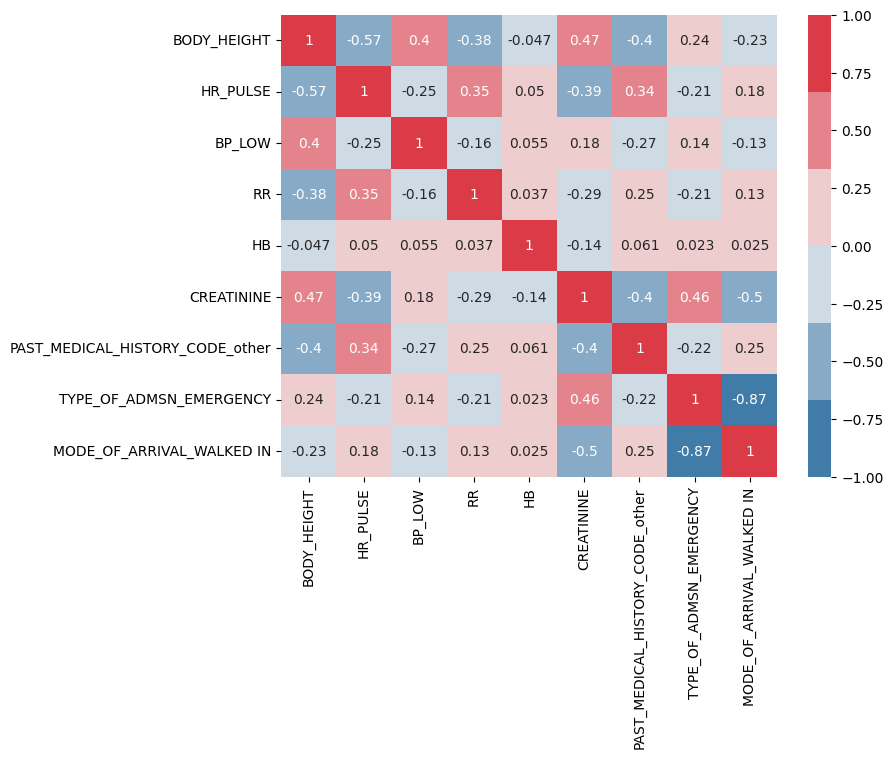

In [42]:
plt.figure( figsize = (8,6) )
sn.heatmap( encoded_mission_final_df[high_vif_cols].corr()
           , annot = True
           , vmax = 1.0
           , vmin = -1.0
           , cmap = sn.diverging_palette(240, 10));

In [43]:
columns_to_remove = ['BODY_HEIGHT',
 'HR_PULSE',
 'BP_LOW',
 'RR',
 'HB',
 'CREATININE',
 'MODE_OF_ARRIVAL_WALKED IN',
 'PAST_MEDICAL_HISTORY_CODE_other']

In [44]:
x_features = list(encoded_mission_final_df.columns)
x_features = list(set(x_features) - set(columns_to_remove))

In [45]:
vif_factors = get_vif_factors(encoded_mission_final_df[x_features] )
vif_factors

,column,vif
0,KEY_COMPLAINTS_CODE_other- heart,2.337095
1,GENDER_M,3.240898
2,IMPLANT_USED__Y,3.268104
3,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,1.242276
4,KEY_COMPLAINTS_CODE_CAD-DVD,2.262975
5,KEY_COMPLAINTS_CODE_PM-VSD,1.202325
6,KEY_COMPLAINTS_CODE_RHD,3.069861
7,KEY_COMPLAINTS_CODE_other-nervous,1.103003
8,TYPE_OF_ADMSN_EMERGENCY,1.798228
9,PAST_MEDICAL_HISTORY_CODE_hypertension2,1.328211


### Split the datasets into train and test datasets

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_features

['KEY_COMPLAINTS_CODE_other- heart',
 'GENDER_M',
 'IMPLANT_USED__Y',
 'STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED',
 'KEY_COMPLAINTS_CODE_CAD-DVD',
 'KEY_COMPLAINTS_CODE_PM-VSD',
 'KEY_COMPLAINTS_CODE_RHD',
 'KEY_COMPLAINTS_CODE_other-nervous',
 'TYPE_OF_ADMSN_EMERGENCY',
 'PAST_MEDICAL_HISTORY_CODE_hypertension2',
 'AGE',
 'MODE_OF_ARRIVAL_TRANSFERRED',
 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
 'KEY_COMPLAINTS_CODE_CAD-VSD',
 'PAST_MEDICAL_HISTORY_CODE_hypertension1',
 'KEY_COMPLAINTS_CODE_CAD-SVD',
 'PAST_MEDICAL_HISTORY_CODE_Hypertension1',
 'KEY_COMPLAINTS_CODE_other- respiratory',
 'KEY_COMPLAINTS_CODE_other-tertalogy',
 'KEY_COMPLAINTS_CODE_other-general',
 'UREA',
 'PAST_MEDICAL_HISTORY_CODE_hypertension3',
 'KEY_COMPLAINTS_CODE_CAD-TVD',
 'KEY_COMPLAINTS_CODE_OS-ASD',
 'STAY_LENGTH_SHORT']

In [48]:
Y = mission_final_df['TOTAL_COST_TO_HOSPITAL']
X = smf.add_constant( encoded_mission_final_df[x_features] )

In [49]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [50]:
len( train_X )

179

In [51]:
len( test_y )

45

In [52]:
lin = smf.OLS( train_y, train_X )
lm = lin.fit()

In [53]:
lm.params

,0
const,142162.503510
KEY_COMPLAINTS_CODE_other- heart,23874.514774
GENDER_M,6864.504451
IMPLANT_USED__Y,90621.225455
STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,74684.238709
KEY_COMPLAINTS_CODE_CAD-DVD,66430.500909
KEY_COMPLAINTS_CODE_PM-VSD,29740.198057
KEY_COMPLAINTS_CODE_RHD,12887.368479
KEY_COMPLAINTS_CODE_other-nervous,65179.770374
TYPE_OF_ADMSN_EMERGENCY,9701.307815


In [54]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Ordinary least squares
======================================================================================================
Model:                         OLS                             Adj. R-squared:              0.497     
Dependent Variable:            TOTAL_COST_TO_HOSPITAL          AIC:                         4368.9332 
Date:                          2025-05-20 11:13                BIC:                         4451.8053 
No. Observations:              179                             Log-Likelihood:              -2158.5   
Df Model:                      25                              F-statistic:                 8.031     
Df Residuals:                  153                             Prob (F-statistic):          1.94e-17  
R-squared:                     0.568                           Scale:                       2.0396e+09
------------------------------------------------------------------------------------------------------
                                           Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------------------------
const                                   142162.5035 16680.8531  8.5225 0.0000  109207.9717 175117.0353
KEY_COMPLAINTS_CODE_other- heart         23874.5148 13969.5640  1.7090 0.0895   -3723.6205  51472.6501
GENDER_M                                  6864.5045  7913.2686  0.8675 0.3870   -8768.8723  22497.8812
IMPLANT_USED__Y                          90621.2255 15416.1390  5.8783 0.0000   60165.2506 121077.2003
STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED    74684.2387 52239.7062  1.4296 0.1549  -28520.0190 177888.4964
KEY_COMPLAINTS_CODE_CAD-DVD              66430.5009 20255.6024  3.2796 0.0013   26413.7290 106447.2728
KEY_COMPLAINTS_CODE_PM-VSD               29740.1981 23586.8445  1.2609 0.2093  -16857.7436  76338.1397
KEY_COMPLAINTS_CODE_RHD                  12887.3685 20694.3346  0.6227 0.5344  -27996.1585  53770.8955
KEY_COMPLAINTS_CODE_other-nervous        65179.7704 34918.9989  1.8666 0.0639   -3805.8656 134165.4063
TYPE_OF_ADMSN_EMERGENCY                   9701.3078 16692.9360  0.5812 0.5620  -23277.0949  42679.7105
PAST_MEDICAL_HISTORY_CODE_hypertension2 -11528.8116 17504.2946 -0.6586 0.5111  -46110.1264  23052.5032
AGE                                        432.1434   240.6700  1.7956 0.0745     -43.3219    907.6086
MODE_OF_ARRIVAL_TRANSFERRED              -7218.3133 25264.5372 -0.2857 0.7755  -57130.6883  42694.0618
PAST_MEDICAL_HISTORY_CODE_Diabetes2      85958.8492 29016.9358  2.9624 0.0035   28633.2719 143284.4265
KEY_COMPLAINTS_CODE_CAD-VSD             -12226.9145 47693.5221 -0.2564 0.7980 -106449.7749  81995.9460
PAST_MEDICAL_HISTORY_CODE_hypertension1   8792.4855 17143.7294  0.5129 0.6088  -25076.5002  42661.4712
KEY_COMPLAINTS_CODE_CAD-SVD             -49425.3142 51745.0986 -0.9552 0.3410 -151652.4299  52801.8014
PAST_MEDICAL_HISTORY_CODE_Hypertension1 -46693.5700 48254.3624 -0.9677 0.3347 -142024.4210  48637.2810
KEY_COMPLAINTS_CODE_other- respiratory    9999.3587 17640.5870  0.5668 0.5717  -24851.2141  44849.9316
KEY_COMPLAINTS_CODE_other-tertalogy      50984.3480 16545.9826  3.0814 0.0024   18296.2649  83672.4310
KEY_COMPLAINTS_CODE_other-general         7662.7656 15551.7384  0.4927 0.6229  -23061.0982  38386.6293
UREA                                        87.4456   348.5673  0.2509 0.8023    -601.1806    776.0718
PAST_MEDICAL_HISTORY_CODE_hypertension3  14332.5738 25892.1342  0.5535 0.5807  -36819.6759  65484.8234
KEY_COMPLAINTS_CODE_CAD-TVD              42867.7595 21160.5763  2.0258 0.0445    1063.1299  84672.3890
KEY_COMPLAINTS_CODE_OS-ASD               16164.1747 17039.5743  0.9486 0.3443  -17499.0433  49827.3927
STAY_LENGTH_SHORT                       -39891.0146  9707.1571 -4.1094 0.0001  -59068.3801 -20713.6491
-------------------------------------------------------------------------

In [55]:
lm.rsquared

np.float64(0.5675210004777885)

## Find Significant Variables

In [56]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [57]:
significant_vars = get_significant_vars( lm )
significant_vars

['const',
 'IMPLANT_USED__Y',
 'KEY_COMPLAINTS_CODE_CAD-DVD',
 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
 'KEY_COMPLAINTS_CODE_other-tertalogy',
 'KEY_COMPLAINTS_CODE_CAD-TVD',
 'STAY_LENGTH_SHORT']

## Building the model with significant variables

In [58]:
best_lreg = smf.OLS( train_y, train_X[significant_vars] )
best_lm = best_lreg.fit()

In [59]:
best_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Ordinary least squares
=================================================================================================
Model:                      OLS                            Adj. R-squared:             0.476     
Dependent Variable:         TOTAL_COST_TO_HOSPITAL         AIC:                        4359.1214 
Date:                       2025-05-20 11:13               BIC:                        4381.4331 
No. Observations:           179                            Log-Likelihood:             -2172.6   
Df Model:                   6                              F-statistic:                27.96     
Df Residuals:               172                            Prob (F-statistic):         3.59e-23  
R-squared:                  0.494                          Scale:                      2.1237e+09
-------------------------------------------------------------------------------------------------
                                       Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------------------------------
const                               170391.5243  8606.6719 19.7976 0.0000 153403.2264 187379.8223
IMPLANT_USED__Y                     101558.9086  9660.1325 10.5132 0.0000  82491.2351 120626.5820
KEY_COMPLAINTS_CODE_CAD-DVD          70112.5859 12626.8683  5.5527 0.0000  45189.0146  95036.1573
PAST_MEDICAL_HISTORY_CODE_Diabetes2  79615.2896 26921.4995  2.9573 0.0035  26476.2295 132754.3498
KEY_COMPLAINTS_CODE_other-tertalogy  30624.3271 12339.9578  2.4817 0.0140   6267.0747  54981.5795
KEY_COMPLAINTS_CODE_CAD-TVD          52010.7510 14605.5512  3.5610 0.0005  23181.5520  80839.9500
STAY_LENGTH_SHORT                   -39166.8825  9200.9443 -4.2568 0.0000 -57328.1863 -21005.5787
-------------------------------------------------------------------------------------------------
Omnibus:                        13.182                  Durbin-Watson:                     1.891 
Prob(Omnibus):                  0.001                   Jarque-Bera (JB):                  14.600
Skew:                           0.573                   Prob(JB):                          0.001 
Kurtosis:                       3.803                   Condition No.:                     11    
=================================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
predict_y = best_lm.predict( test_X[significant_vars] )

### PP Plot

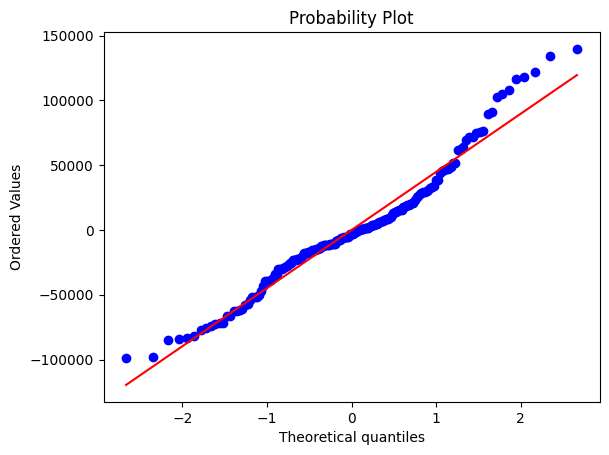

In [61]:
stats.probplot( best_lm.resid , dist="norm", plot=plt )
plt.show()

In [62]:
rmse( test_y, predict_y )

np.float64(43545.53208498999)

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(test_y, predict_y)

0.5231277520747966

## Lasso Model

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso(alpha = 1000.0)

In [67]:
lasso.fit(train_X[x_features], train_y)

Lasso(alpha=1000.0)

In [68]:
lasso.score(test_X[x_features], test_y)

0.47528147523587494

In [69]:
lasso.intercept_

np.float64(152981.7963857546)

In [70]:
lasso.coef_

array([  2415.43058757,   7003.50159991,  77734.0605645 ,      0.        ,
        20235.9362312 ,      0.        ,     -0.        ,      0.        ,
         6338.81825269,     -0.        ,    650.87250015,     -0.        ,
        41151.70215163,     -0.        ,      0.        ,     -0.        ,
           -0.        ,     -0.        ,  18790.62226654, -10087.22673636,
          144.84670046,      0.        ,  12359.40841562,     -0.        ,
       -31491.51447069])

In [71]:
lasso_coefs_df = pd.DataFrame({ "features" : x_features,
                                "coefs" : lasso.coef_})

In [72]:
lasso_coefs_df[lasso_coefs_df.coefs == 0.0]

,features,coefs
3,STATE_AT_THE_TIME_OF_ARRIVAL_CONFUSED,0.0
5,KEY_COMPLAINTS_CODE_PM-VSD,0.0
6,KEY_COMPLAINTS_CODE_RHD,-0.0
7,KEY_COMPLAINTS_CODE_other-nervous,0.0
9,PAST_MEDICAL_HISTORY_CODE_hypertension2,-0.0
11,MODE_OF_ARRIVAL_TRANSFERRED,-0.0
13,KEY_COMPLAINTS_CODE_CAD-VSD,-0.0
14,PAST_MEDICAL_HISTORY_CODE_hypertension1,0.0
15,KEY_COMPLAINTS_CODE_CAD-SVD,-0.0
16,PAST_MEDICAL_HISTORY_CODE_Hypertension1,-0.0


In [73]:
imp_features = list(lasso_coefs_df[lasso_coefs_df.coefs != 0.0].features)

In [74]:
imp_features

['KEY_COMPLAINTS_CODE_other- heart',
 'GENDER_M',
 'IMPLANT_USED__Y',
 'KEY_COMPLAINTS_CODE_CAD-DVD',
 'TYPE_OF_ADMSN_EMERGENCY',
 'AGE',
 'PAST_MEDICAL_HISTORY_CODE_Diabetes2',
 'KEY_COMPLAINTS_CODE_other-tertalogy',
 'KEY_COMPLAINTS_CODE_other-general',
 'UREA',
 'KEY_COMPLAINTS_CODE_CAD-TVD',
 'STAY_LENGTH_SHORT']

## KNN Model

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [76]:
knn_v1 = KNeighborsRegressor(**{'n_neighbors': 12, 'weights': 'distance'})

In [77]:
scaler = StandardScaler()

In [78]:
scaler.fit(train_X[imp_features])

StandardScaler()

In [79]:
train_X_scaled = scaler.transform(train_X[imp_features])
test_X_scaled = scaler.transform(test_X[imp_features])

In [80]:
knn_v1.fit(train_X_scaled, train_y)

KNeighborsRegressor(n_neighbors=12, weights='distance')

In [81]:
knn_pred_y = knn_v1.predict(test_X_scaled)

In [82]:
r2_score(test_y, knn_pred_y)

0.3034661567442293

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {"n_neighbors": range(10, 30, 2),
          "weights": ['uniform', 'distance']}

In [85]:
grid = GridSearchCV(KNeighborsRegressor(),
                    param_grid = params,
                    cv = 2,
                    scoring = 'r2')

In [86]:
grid.fit(train_X_scaled, train_y)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(10, 30, 2),
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [87]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [88]:
grid.best_score_

np.float64(0.29835237497466605)

In [89]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002730,0.000466,0.002729,1.037121e-04,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.355991,0.240714,0.298352,0.057639,1
1,0.006240,0.002538,0.006747,1.548767e-03,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.287712,0.236255,0.261983,0.025728,3
2,0.001552,0.000066,0.002635,3.993511e-05,12,uniform,"{'n_neighbors': 12, 'weights': 'uniform'}",0.326961,0.223471,0.275216,0.051745,2
3,0.001508,0.000023,0.002895,2.261400e-04,12,distance,"{'n_neighbors': 12, 'weights': 'distance'}",0.278529,0.227290,0.252910,0.025619,5
4,0.004233,0.001671,0.002532,1.192093e-07,14,uniform,"{'n_neighbors': 14, 'weights': 'uniform'}",0.319877,0.186059,0.252968,0.066909,4
5,0.001476,0.000039,0.002557,4.315376e-05,14,distance,"{'n_neighbors': 14, 'weights': 'distance'}",0.278706,0.209672,0.244189,0.034517,6
6,0.002124,0.000600,0.002560,8.249283e-05,16,uniform,"{'n_neighbors': 16, 'weights': 'uniform'}",0.309774,0.151910,0.230842,0.078932,8
7,0.001420,0.000009,0.002597,4.923344e-05,16,distance,"{'n_neighbors': 16, 'weights': 'distance'}",0.274449,0.188708,0.231579,0.042871,7
8,0.001610,0.000040,0.002605,6.318092e-06,18,uniform,"{'n_neighbors': 18, 'weights': 'uniform'}",0.300990,0.137793,0.219392,0.081599,11
9,0.005594,0.003992,0.003137,4.043579e-04,18,distance,"{'n_neighbors': 18, 'weights': 'distance'}",0.269530,0.184859,0.227195,0.042336,9
